600.0
2.0325810761994547
0.6302507710695912 0.3584571000451818


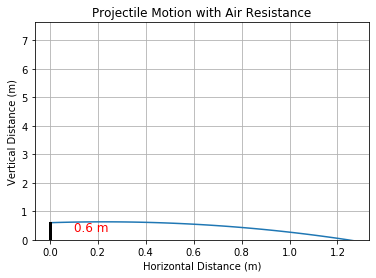

Time of flight : 0.45 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81  # Acceleration due to gravity (m/s^2)
v0 =  3  # Initial velocity (m/s)

launch_angle = 15  
initial_height = 0.6
mass = 0.35    # mass of projecile
r = 0.085
rho = 1.27
cd = 0.47
A = 2*np.pi*r**2
k = (1/2)*rho*A*cd  # Air resistance constant (tune this value as needed, depending on the projectile and environment)
theta = np.radians(launch_angle)
H = ((v0**2)*(np.sin(theta))**2)/(g*(2+k*(v0**2)*np.sin(theta))) + initial_height
T = 2*np.sqrt(2*H/g)
Va = (v0*np.cos(theta))/(np.sqrt(1+k*(v0**2)*(np.sin(theta)+((np.cos(theta))**2)*np.log10(np.tan((theta/2) + (np.pi/4))))))
D = Va*T
print(v0/0.005)
print(D)
print(H,T/2)

def calculating_Acclel(t, state, k, m):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    F_air_x = -k * v * vx
    F_air_y = -k * v * vy
    ax = F_air_x / m
    ay = (F_air_y - m * g) / m
    return [vx, vy, ax, ay]

def runge_kutta_step(t, state, dt, k, m):
    k1 = calculating_Acclel(t, state, k, m)
    k2 = calculating_Acclel(t + 0.5*dt, [s + 0.5*dt*k for s, k in zip(state, k1)], k, m)
    k3 = calculating_Acclel(t + 0.5*dt, [s + 0.5*dt*k for s, k in zip(state, k2)], k, m)
    k4 = calculating_Acclel(t + dt, [s + dt*k for s, k in zip(state, k3)], k, m)
  
    return [s + dt/6 * (k1_i + 2*k2_i + 2*k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, k1, k2, k3, k4)]

def projectile_motion_with_air_resistance(v0, theta, h0, k, m):
    if k==0 and theta==90:
        vx0=0
        vy0=v0
    else:
        theta = np.radians(theta)
        vx0 = v0 * np.cos(theta)
        vy0 = v0 * np.sin(theta)
    state = [0, h0, vx0, vy0]
    dt = 0.01
    times = [0]
    x_values = [0]
    y_values = [h0]
    
    while state[1] >= 0:
        t = times[-1]
        state = runge_kutta_step(t, state, dt, k, m)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
    
    time_of_flight = times[-1]
    
    return time_of_flight, times, x_values, y_values


time_of_flight, times, x_values, y_values = \
projectile_motion_with_air_resistance(v0, launch_angle,initial_height, k, mass)

plt.plot(x_values, y_values)
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.title('Projectile Motion with Air Resistance')
plt.ylim(0,max(y_values)+7)
plt.plot([0,0],[0,initial_height],'k',linewidth=3)
plt.text(0.1,initial_height/2, "%g m" %(initial_height), fontsize=12, color='red')
plt.grid(True)
plt.show()

print(f'Time of flight : {time_of_flight:.2f} seconds')


### How to Take paramter to create equation.

In [3]:
Vo = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0]
g = 9.81  # Acceleration due to gravity (m/s^2)
launch_angle = 37 # Angle shooterr
initial_height = 0.35 # Height start
mass = 0.2    # mass of projecile
r = 0.085     # radius of ball
rho = 1.27  # air identity
cd = 0.47  # coeficient force
A = 4*np.pi*(r**2) # suface of sphrere ball
k = (1/2)*rho*A*cd  # gain drage force
theta = np.radians(launch_angle) # convert degree to radians 
H = [(((Vo[0])**2)*(np.sin(theta)**2))/(g*(2+k*((Vo[0])**2)*np.sin(theta))) + initial_height]
 # Calculate from ground to Max H
h = [H[0] - initial_height]
T = [2*np.sqrt(2*H[0]/g)]  #  time to end ball
Va = [(Vo[0]*np.cos(theta))/(np.sqrt(1+k*(Vo[0]**2)*(np.sin(theta)+((np.cos(theta))**2)*(2.303*np.log(np.tan((theta/2) + (np.pi/4)))))))]
D = [Va[0]*T[0]]  # Distance 
# print(len(Vo))
for i in range(37): 
    H.append((((Vo[i])**2)*(np.sin(theta)**2))/(g*(2+k*((Vo[i])**2)*np.sin(theta))) + initial_height)
    h.append(H[i] - initial_height)
    T.append(2*np.sqrt(2*H[i]/g))
    Va.append((Vo[i]*np.cos(theta))/(np.sqrt(1+k*(Vo[i]**2)*(np.sin(theta)+((np.cos(theta))**2)*(2.303*np.log(np.tan((theta/2) + (np.pi/4))))))))
    D.append(Va[i]*T[i])
    
print(D)
print(H)
# print(Vo/0.005)
# print(D)
# print(H,h)

[0.0, 0.0, 0.0, 0.21217150225719608, 0.42031963471427625, 0.626259608545874, 0.8314730534138226, 1.0366602645565655, 1.241650197239565, 1.4455819127941703, 1.6471955271066774, 1.8451054848041168, 2.0379980003376366, 2.2247462547540624, 2.404460673629642, 2.5764962812851366, 2.7404354293435103, 2.8960586131653647, 3.0433112862933274, 3.182271175350392, 3.313118410991906, 3.4361094735862605, 3.5515551983468496, 3.6598026765360325, 3.761220687296642, 3.856188212624112, 3.9450855741194717, 4.028287753408279, 4.1061594999095075, 4.179051878947928, 4.247299963559779, 4.311221421108493, 4.371115789125672, 4.427264272833429, 4.479929929460139, 4.529358131990387, 4.575777227854472, 4.619399326816314]
[0.35, 0.35, 0.35460556254536185, 0.36831050481134775, 0.3907863010795737, 0.4215070346537349, 0.4597793702829492, 0.5047800156044333, 0.5555970755653017, 0.6112717256733506, 0.6708370989401973, 0.7333520503330941, 0.7979283594324282, 0.8637508013754405, 0.9300902460950987, 0.9963104772146013, 1.06